In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Especifica la ruta al archivo .xlsx
file_path = 'selected_columns_data8.xlsx'

# Cargar el archivo en un DataFrame
datos = pd.read_excel(file_path)

   Gender_Women  Age Group_Senior (61+)  Age Group_Young (16-30)  \
0             1                       0                        0   
1             1                       1                        0   
2             1                       1                        0   
3             1                       0                        0   
4             0                       0                        0   

   Main occupation_Office Workers  \
0                               0   
1                               1   
2                               0   
3                               0   
4                               0   

   Main occupation_Operators and Service Workers  \
0                                              1   
1                                              0   
2                                              1   
3                                              1   
4                                              1   

   Main occupation_Scientific and Intellectual Professi

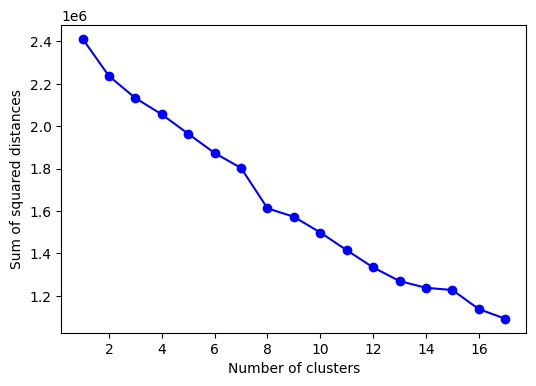

In [21]:
# Convertir las variables categóricas en variables dummies (One-Hot Encoding)
datos_encoded = pd.get_dummies(datos, drop_first=True)

# Verificar las primeras filas del nuevo DataFrame
print(datos_encoded.head())

from sklearn.preprocessing import StandardScaler

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(datos_encoded)

# Verificar el resultado
print(X_scaled)

# Lista para guardar la suma de los errores cuadráticos (inertia) para cada número de clusters
inertia = []

# Rango de posibles valores de k (número de clusters)
k_range = range(1, 18)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

plt.show()

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia entre 'Seniority in the job' y 'Age group'
contingency_table = pd.crosstab(datos['Seniority in the job (months)'], datos['Age Group'])

# Realizar el test de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados
print(f"Chi-cuadrado: {chi2}, p-valor: {p}")

contingency_table

Chi-cuadrado: 8141.943321251064, p-valor: 0.0


Age Group,Adult (31-60),Senior (61+),Young (16-30)
Seniority in the job (months),,,
Amateur,46707,1380,18404
Senior,23955,1693,581


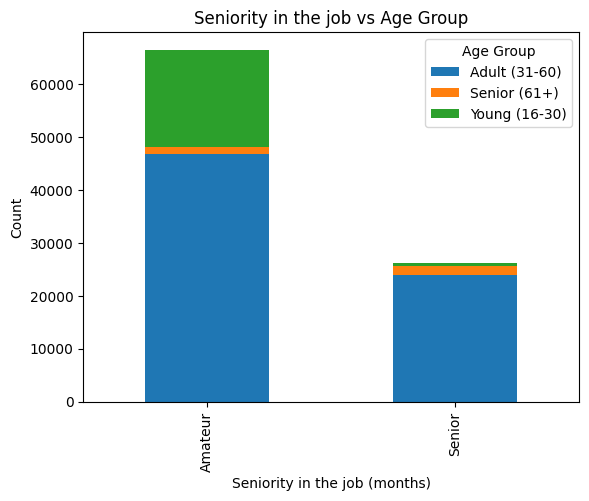

In [23]:
# Crear un gráfico de barras
contingency_table.plot(kind='bar', stacked=True)

# Añadir título y etiquetas
plt.title('Seniority in the job vs Age Group')
plt.xlabel('Seniority in the job (months)')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()
